In [4]:
#!pip install hazm
import pandas as pd
import re
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from hazm import word_tokenize, sent_tokenize, Normalizer, stopwords_list
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def preprocessing(text):
    
    normalizer = Normalizer()
    text = normalizer.normalize(text)
    #text = normalizer.normalize(text.tostring().decode())

    text = re.sub(r'[^\w\s0-9۰-۹آ-ی]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.replace("غیر فعال", "غیرفعال")
    words = word_tokenize(text)
    
    custom_stop_words  = ['و','احنرام','شاخه','ببخشید','ممنون','سلام','بخیر','این','با','که','شریف','پرستار','برکه','ماهی','زهرا','قیمه','خوشید','عه','هط','مترو','احترام']
    words = [word if word not in ["شاتل","مخابرات","ایرانسل", "رایتل","رایتلم","ایرانسلم","شاتلم"] else " خارج از دامنه خارج از دامنه خارج از دامنه" for word in words]
    
    words = [word for word in words if word not in custom_stop_words]
    
    text = " ".join(words)
    
    return text

In [6]:
train_df = pd.read_excel('train.xlsx')
new_df = pd.DataFrame(columns=['text', 'intent'])
for column in train_df.columns:
    label = train_df.iloc[:0][column]
    for i in range(1, len(train_df)):
        text = train_df.iloc[i][column]
        new_row = {'text': text, 'intent': label.name}
        new_df = new_df.append(new_row, ignore_index=True)
train_df = new_df.sample(frac=1, random_state=42)
train_df.dropna(inplace=True)

C:\Users\thearshiya\AppData\Local\Temp\ipykernel_14668\3044957153.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
C:\Users\thearshiya\AppData\Local\Temp\ipykernel_14668\3044957153.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
C:\Users\thearshiya\AppData\Local\Temp\ipykernel_14668\3044957153.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
C:\Users\thearshiya\AppData\Local\Temp\ipykernel_14668\3044957153.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.app

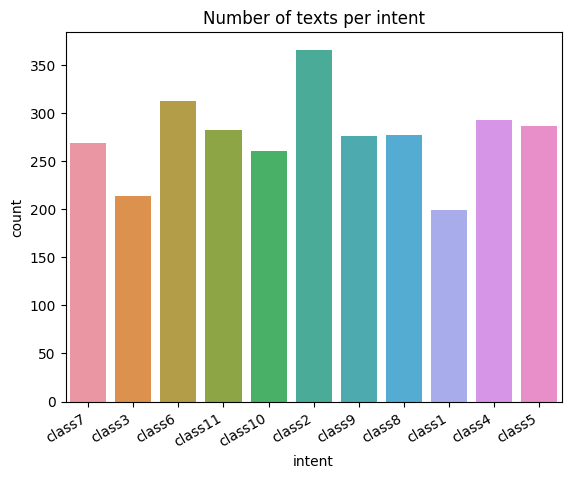

In [7]:
chart = sns.countplot(x = train_df.intent)
plt.title("Number of texts per intent")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3034 entries, 2401 to 3174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3034 non-null   object
 1   intent  3034 non-null   object
dtypes: object(2)
memory usage: 71.1+ KB


In [9]:
train_df.intent.value_counts()

class2     366
class6     312
class4     293
class5     286
class11    282
class8     277
class9     276
class7     269
class10    260
class3     214
class1     199
Name: intent, dtype: int64

In [10]:
train_df.to_excel("data.xlsx", sheet_name='Sheet1', encoding='utf-8-sig', index=False)

C:\Users\thearshiya\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# testdata

In [11]:
test_df = pd.read_excel('test.xlsx')
new_df = pd.DataFrame(columns=['text', 'intent'])
for column in test_df.columns:
    label = test_df.iloc[:0][column]
    for i in range(1, len(test_df)):
        text = test_df.iloc[i][column]
        new_row = {'text': text, 'intent': label.name}
        new_df = new_df.append(new_row, ignore_index=True)
test_df = new_df.sample(frac=1, random_state=42)
test_df.dropna(inplace=True)

C:\Users\thearshiya\AppData\Local\Temp\ipykernel_14668\994143385.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
C:\Users\thearshiya\AppData\Local\Temp\ipykernel_14668\994143385.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
C:\Users\thearshiya\AppData\Local\Temp\ipykernel_14668\994143385.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
C:\Users\thearshiya\AppData\Local\Temp\ipykernel_14668\994143385.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(

In [13]:
train_df['text'] = train_df['text'].apply(lambda x: preprocessing(x))
test_df['text'] = test_df['text'].apply(lambda x: preprocessing(x))

In [14]:
test_df.head(5)

,text,intent
24,از طریق کد دستوری خواستم اهنگ پیشواز فعال کنم ...,class2
199,اگه بخوام کدمو عوض کنم چیکار کنم,class10
113,رفیق کد انتظارمو ازم خواست یادم نبود چیه,class6
226,غذا چی میخوره,class11
66,وقتی به دوستم زنگ میزنه اوای انتظارش نمیخونه و...,class4


In [15]:
train_df.head(5)

,text,intent
2401,روزتون به خیر من یه آهنگی دوستم برای آوای انتظ...,class7
798,علیکم خوب هستید اوای انتظارم تغییر نمیکنه چرا,class3
2382,از چه روشی میتوان کد اهنگ پشت خطی دوستم را دری...,class7
2066,اهنگ پشت خطیمو چه کدی بگیرم,class6
787,از همه راهها تلاش کردم اهنگ پشت خطی رو تغییر ب...,class3


In [16]:
vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

transformer = TfidfTransformer()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [17]:
# Get the vocabulary of the model
vocabulary = vectorizer.vocabulary_

# Get the idf scores of the words in the vocabulary
idf_scores = transformer.idf_

# Create a dictionary to store the idf scores for each word
idf_dict = {}
for word, index in vocabulary.items():
    idf_dict[word] = idf_scores[index]

# Sort the words by their idf scores
sorted_words = sorted(idf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 words with the highest idf scores
print('Top 15 words with the highest idf scores:')
for word, idf_score in sorted_words[:15]:
    print(f'{word}: {idf_score:.3f}')

Top 15 words with the highest idf scores:
بدیه: 8.325
مخاطبمم: 8.325
اعصابش: 8.325
خودشو: 8.325
کددستوری: 8.325
الانو: 8.325
دلار: 8.325
پدر: 8.325
مرحومم: 8.325
زنده: 8.325
موندن: 8.325
موبایلش: 8.325
ویدئویی: 8.325
توضیحات: 8.325
نا: 8.325


# Model

In [18]:
# Train the model
model = SVC(kernel='linear')
model.fit(X_train, train_df['intent'])

accuracy_train = model.score(X_train, train_df['intent'])
print(f'Train accuracy: {accuracy_train:.5f}')

y_pred = model.predict(X_test)

accuracy = accuracy_score(test_df['intent'], y_pred)
precision = precision_score(test_df['intent'], y_pred, average='weighted')
recall = recall_score(test_df['intent'], y_pred, average='weighted')
f1 = f1_score(test_df['intent'], y_pred, average='weighted')

# Print evaluation metrics
print(f'Test Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 score: {f1:.5f}')

Train accuracy: 0.98154
Test Accuracy: 0.88608
Precision: 0.902
Recall: 0.886
F1 score: 0.89044


# classification_report(testdata)

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [20]:
print(metrics.classification_report(test_df['intent'], model.predict(X_test), target_names=train_df.intent.unique()))

              precision    recall  f1-score   support

      class7       1.00      1.00      1.00         1
      class3       1.00      1.00      1.00         3
      class6       1.00      1.00      1.00         7
     class11       1.00      0.95      0.98        22
     class10       0.33      1.00      0.50         1
      class2       0.89      0.89      0.89         9
      class9       0.75      0.75      0.75         8
      class8       0.90      0.75      0.82        12
      class1       0.75      0.75      0.75         4
      class4       0.83      0.83      0.83         6
      class5       0.86      1.00      0.92         6

    accuracy                           0.89        79
   macro avg       0.85      0.90      0.86        79
weighted avg       0.90      0.89      0.89        79



In [21]:
y_true = test_df['intent']
y_pred = model.predict(X_test)

micro_f1 = f1_score(y_true, y_pred, average='micro')
macro_f1 = f1_score(y_true, y_pred, average='macro')
weighted_f1 = f1_score(y_true, y_pred, average='weighted')

print("Micro F1-score: {:.4f}".format(micro_f1))
print("Macro F1-score: {:.4f}".format(macro_f1))
print("Weighted F1-score: {:.4f}".format(weighted_f1))
print("Model: {}".format(model))

Micro F1-score: 0.8861
Macro F1-score: 0.8582
Weighted F1-score: 0.8904
Model: SVC(kernel='linear')


# -----------------------------------------------------------------------------------------------------

In [24]:
new_sentence = " !!! با سلام و احترام. غیر  فعال کردن سرویس اوای انتظار از چه طریقی امکان پذیره؟ لطفا کمک کنید"
new_sentence = preprocessing(new_sentence)
new_sentence_vectorized = vectorizer.transform([new_sentence])
new_sentence_transformed = transformer.transform(new_sentence_vectorized)
intent = model.predict(new_sentence_transformed)[0]
print("User's intent:", intent)
print(new_sentence)

User's intent: class9
غیرفعال کردن سرویس اوای انتظار از چه طریقی امکان پذیره لطفا کمک کنید


In [121]:
def predict_and_save(input_file_path, output_file_path):
    
    input_files = [f for f in os.listdir(input_file_path) if f.endswith('.xlsx')]
    if not input_files:
        raise ValueError('No Excel file found in the input directory')
    input_file_path = input_files[0]
    _, file_extension = os.path.splitext(input_file_path)
    if file_extension in ['.xls', '.xlsx']:
        data = pd.read_excel(input_file_path)
    else:
        raise ValueError('Unsupported file format')

    sentences = data.iloc[:, 0].tolist()

    results = []
    for sentence in sentences:
        new_sentence = preprocessing(sentence)
        new_sentence_vectorized = vectorizer.transform([new_sentence])
        new_sentence_transformed = transformer.transform(new_sentence_vectorized)
        prediction = model.predict(new_sentence_transformed)
        results.append(prediction[0])
        
    output_file_path = os.path.join(output_file_path, 'output_AlphaTeam.xlsx')
    output_df = pd.DataFrame({'samples': sentences, 'class': results})
    output_df.to_excel(output_file_path, sheet_name='Sheet1', encoding='utf-8-sig', index=False)